In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
data = pd.read_csv('resource/spam.csv', encoding='latin1')
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [9]:
data[:5]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [10]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

In [11]:
data['v1'] = data['v1'].replace(['ham', 'spam'], [0, 1])
data[:5]

/tmp/ipykernel_10723/2707128778.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['v1'] = data['v1'].replace(['ham', 'spam'], [0, 1])


,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [13]:
print('결측값 여부 :',data.isnull().values.any())

결측값 여부 : False


In [15]:
print('v2열의 유니크한 값 :',data['v2'].nunique()) # 중복을 제거한 개수

v2열의 유니크한 값 : 5169


In [16]:
data.drop_duplicates(subset=['v2'], inplace=True) # 중복이 있다면 중복 제거
print('총 샘플의 수:', len(data))

총 샘플의 수: 5169


<Axes: xlabel='v1'>

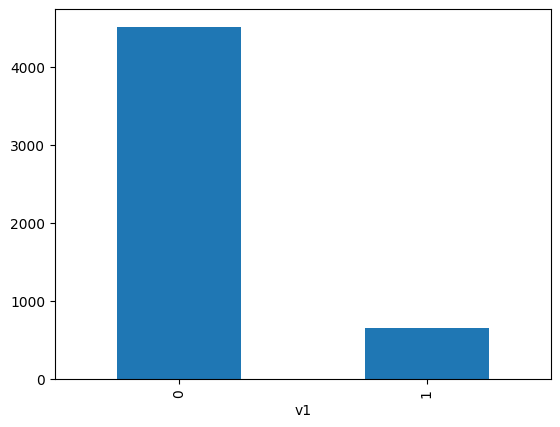

In [18]:
data['v1'].value_counts().plot(kind='bar') # 레이블 값의 분포를 시각화
# 대부분이 정상메일임을 확인할 수 있음

In [20]:
print('정상 메일과 스팸 메일의 개수')
print(data.groupby('v1').size().reset_index(name='count'))
print(f'정상 메일의 비율 = {round(data["v1"].value_counts()[0]/len(data) * 100,3)}%')
print(f'스팸 메일의 비율 = {round(data["v1"].value_counts()[1]/len(data) * 100,3)}%')

정상 메일과 스팸 메일의 개수
   v1  count
0   0   4516
1   1    653
정상 메일의 비율 = 87.367%
스팸 메일의 비율 = 12.633%


In [21]:
X_data = data['v2']
y_data = data['v1']
print('메일 본문의 개수: {}'.format(len(X_data)))
print('레이블의 개수: {}'.format(len(y_data)))

메일 본문의 개수: 5169
레이블의 개수: 5169


In [ ]:
# 훈련 데이터와 테스트 데이터를 분리합니다. 주의할 점은 현재 레이블이 굉장히 불균형합니다. 
# 다시 말해 정상 메일 샘플(87%, 4516개)에 비해서 스팸 메일 샘플(12%, 653개)이 굉장히 적습니다.
# 만약, 훈련 데이터와 테스트 데이터를 분리하는 과정에서 우연히 대부분의 스팸 메일 샘플이 테스트 데이터에 포함되고 훈련 데이터에는 대부분 정상 메일 샘플만 포함되게 된다면 어떻게 될까요? 
#학습 과정에서 모델은 스팸 메일 샘플을 거의 관측하지 못해서 모델의 성능이 저하될 것입니다.

# 이렇게 레이블이 불균형한 경우에는 데이터를 나눌 때에도 훈련 데이터와 테스트 데이터에 각 레이블의 분포가 고르게 분포되도록 하는 것이 중요할 수 있습니다. 
# 사이킷 런의 train_test_split에 stratify의 인자로서 레이블 데이터를 기재하면 훈련 데이터와 테스트 데이터를 분리할 때 레이블의 분포가 고르게 분포하도록 합니다.
# test_size에 0.2를 기재하여 훈련 데이터와 테스트 데이터를 8:2 비율로 분리합니다.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [24]:
print('--------훈련 데이터의 비율-----------')
print(f'정상 메일 = {round(y_train.value_counts()[0]/len(y_train) * 100,3)}%')
print(f'스팸 메일 = {round(y_train.value_counts()[1]/len(y_train) * 100,3)}%')

print('--------테스트 데이터의 비율-----------')
print(f'정상 메일 = {round(y_test.value_counts()[0]/len(y_test) * 100,3)}%')
print(f'스팸 메일 = {round(y_test.value_counts()[1]/len(y_test) * 100,3)}%')

--------훈련 데이터의 비율-----------
정상 메일 = 87.376%
스팸 메일 = 12.624%
--------테스트 데이터의 비율-----------
정상 메일 = 87.331%
스팸 메일 = 12.669%


In [26]:
# 케라스 토크나이저를 통해 훈련 데이터에 대해서 토큰화와 정수 인코딩 과정을 수행합니다. 
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train) # 문자열 데이터(코퍼스)를 빈도수 기준으로 단어 집합을 생성
X_train_encoded = tokenizer.texts_to_sequences(X_train) # 텍스트 안의 단어들을 숫자의 시퀀스의 형태로 변환
print(X_train_encoded[:5])

[[102, 1, 210, 230, 3, 17, 39], [1, 59, 8, 427, 17, 5, 137, 2, 2326], [157, 180, 12, 13, 98, 93, 47, 9, 40, 3485, 247, 8, 7, 87, 6, 80, 1312, 5, 3486, 7, 2327, 11, 660, 306, 20, 25, 467, 708, 1028, 203, 129, 193, 800, 2328, 23, 1, 144, 71, 2, 111, 78, 43, 2, 130, 11, 800, 186, 122, 1512], [1, 1154, 13, 104, 292], [222, 622, 857, 540, 623, 22, 23, 83, 10, 47, 6, 257, 32, 6, 26, 64, 936, 407]]


In [28]:
# 각 정수가 어떤 단어에 부여되어있는지 확인
word_to_index = tokenizer.word_index
print(word_to_index)

# 빈도수가 높을 수록 숫자가 높음 i는 제일 많이 등장한다는 의미

{'i': 1, 'to': 2, 'you': 3, 'a': 4, 'the': 5, 'u': 6, 'and': 7, 'in': 8, 'is': 9, 'me': 10, 'my': 11, 'for': 12, 'your': 13, 'it': 14, 'of': 15, 'have': 16, 'on': 17, 'call': 18, 'that': 19, 'are': 20, '2': 21, 'now': 22, 'so': 23, 'but': 24, 'not': 25, 'can': 26, 'or': 27, "i'm": 28, 'get': 29, 'at': 30, 'do': 31, 'if': 32, 'be': 33, 'will': 34, 'just': 35, 'with': 36, 'we': 37, 'no': 38, 'this': 39, 'ur': 40, 'up': 41, '4': 42, 'how': 43, 'gt': 44, 'lt': 45, 'go': 46, 'when': 47, 'from': 48, 'what': 49, 'ok': 50, 'out': 51, 'know': 52, 'free': 53, 'all': 54, 'like': 55, 'then': 56, 'got': 57, 'good': 58, 'am': 59, 'time': 60, 'was': 61, 'come': 62, 'its': 63, 'love': 64, 'want': 65, 'text': 66, 'he': 67, 'only': 68, 'there': 69, 'day': 70, 'need': 71, 'going': 72, 'lor': 73, 'send': 74, 'one': 75, 'as': 76, 'home': 77, 'about': 78, 'back': 79, 'still': 80, 'k': 81, 'see': 82, 'txt': 83, 'by': 84, 'da': 85, 'stop': 86, 'r': 87, 'any': 88, 'tell': 89, 'dont': 90, "i'll": 91, "don't": 9

In [33]:
threshold = 2
total_cnt = len(word_to_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    #단어의 등장 빈도수가 threshold 보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합(vocabulary)에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

등장 빈도가 1번 이하인 희귀 단어의 수: 4337
단어 집합(vocabulary)에서 희귀 단어의 비율: 55.45326684567191
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 6.65745644331875


In [35]:
# tokenizer = Tokenizer(num_words = total_cnt - rare_cnt + 1)
#위와 같은 코드로 빈도수가 적은 단어들을 제한할 수 있지만, 그냥 진행

In [36]:
vocab_size = len(word_to_index) + 1
print('단어 집합의 크기: {}'.format((vocab_size)))

단어 집합의 크기: 7822


메일의 최대 길이 : 189
메일의 평균 길이 : 15.754534


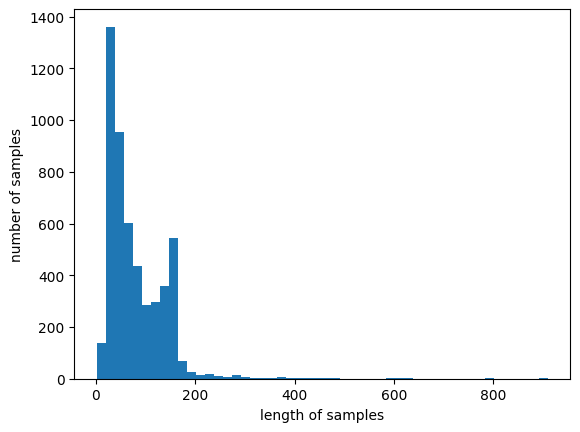

In [37]:
print('메일의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
plt.hist([len(sample) for sample in X_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [38]:
# 데이터 패딩
max_len = 189
X_train_padded = pad_sequences(X_train_encoded, maxlen = max_len)
print("훈련 데이터의 크기(shape):", X_train_padded.shape)

훈련 데이터의 크기(shape): (4135, 189)


In [41]:
# RNN으로 스팸 메일분류
# 하이퍼파라미터인 임베딩 벡터의 차원은 32, 은닉 상태의 크기는 32 모델은 다대일구조의 RNN
# 마지막 시점에서 2개 선택지 중 하나를 예측하는 이진 분류 문제를 수행하는 모델
# 이진 분류의 문제의 경우 출력층에서 로지스틱 회귀를 수행 해야하므로 활성화 함수로 시그모이드 함수를 사용
# 손실 함수로는 크로스 엔트로피 함수를 사용하여 4번의 에포크를 수행
# 하이퍼파라미터인 배치 크기는 64이며, validation_split=0.2를 사용하여 훈련 데이터의 20%를 검증 데이터로 분리해서 사용하고, 검증

from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) # 정확도를 같이확인
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 [==============================] - 2s 23ms/step - loss: 0.4587 - acc: 0.8156 - val_loss: 0.2531 - val_acc: 0.9541
Epoch 2/4
52/52 [==============================] - 1s 20ms/step - loss: 0.1516 - acc: 0.9658 - val_loss: 0.1068 - val_acc: 0.9734
Epoch 3/4
52/52 [==============================] - 1s 20ms/step - loss: 0.0739 - acc: 0.9804 - val_loss: 0.0790 - val_acc: 0.9758
Epoch 4/4
52/52 [==============================] - 1s 21ms/step - loss: 0.0378 - acc: 0.9900 - val_loss: 0.0708 - val_acc: 0.9794


In [42]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = max_len)
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 0s 5ms/step - loss: 0.0756 - acc: 0.9807

 테스트 정확도: 0.9807


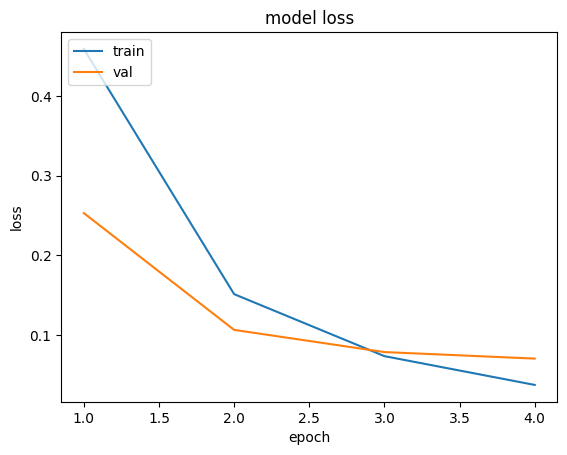

In [43]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [44]:
# 데이터의 양이 적어서 과적합이 빠르게 시작되므로 검증 데이터의 오차가 증가하는 시점의 바로 직전인 에포크 3~4 정도가 적당함을 볼 수 있다.